In [1]:
import numpy as np  
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

<p style="align: center;"><img align=center src="https://netology.ru/backend/tilda/images/tild3439-3364-4535-b334-656263633534__main.svg"  width=900></p>
<h3 style="text-align: center;"><b>«Доверительные интервалы. Статистическая проверка гипотез для несвязанных выборок »</b></h3>


In [2]:
#Вспомогательная функция для подсчета доверительного интервала

def mean_confidence_interval(data, confidence=0.95): #Сложный пример реализации. Проще смотри в лекци. 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h 

In [3]:
a =  [5,7,7,9,10,16,7,14,13,15,16,15,
     16,17,18,13,14,15,6,13, 14, 12 ,13 ]

print(mean_confidence_interval(a, 0.60))
print(mean_confidence_interval(a, 0.90))

(11.707786838827133, 12.391304347826088, 13.074821856825043)
(11.02521592553596, 12.391304347826088, 13.757392770116216)


<h3 style="text-align: center;"><b>Выборы в президенты или зачем нам доверительные интерваллы?!</b></h3>

<p style="align: center;"><img align=center src="https://www.englisch-hilfen.de/images/usa/states/map.gif"  width=400></p>



In [4]:
US_elect_county = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/2012_US_elect_county.csv'
 
df = pd.read_csv(US_elect_county, sep=',',  error_bad_lines=False) # Откроем датасет

In [5]:
df.dropna(how='any',inplace=True)  #Удалим пустые значения
df=df[df['%']!='#DIV/0!'][['State Postal','County Name','%']] #Удалим мусор из данных и оставим только нужное
df['%'] = df['%'].astype(float) # Приведем к численному значению результаты голосования
df

,State Postal,County Name,%
0,AK,Alaska,41.6
1,AK,Alaska,41.6
2,AL,Alabama,38.4
3,AL,Autauga,26.6
4,AL,Baldwin,21.6
...,...,...,...
4069,WV,Webster,34.2
4070,WV,Wetzel,37.8
4071,WV,Wirt,31.1
4072,WV,Wood,32.9


Среднее по всей выборке:  44.07946954813346


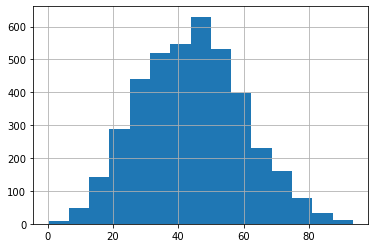

In [6]:
df['%'].hist(bins=15)
print('Среднее по всей выборке: ',df['%'].mean())

In [7]:
some_states_1 = ['AK','OH','WV','ME','CA','MD']
some_states_2 = ['WA','AK','DE']
some_states_3 = ['AZ','RI','MA']

sub_df = df.loc[df['State Postal'].isin(some_states_2)]  # Выборка по нескольким штатам
l,s,r=mean_confidence_interval(sub_df['%'], 0.99)
l,s,r

(42.025084908626724, 46.23478260869564, 50.444480308764554)

In [8]:
#df['State Postal'].value_counts()  # Раскомментить, если интересно соотношение штатов. 

<p style="align: center;"><img align=center src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQM7ZUiNIwL4fZho5F7zqWpLBw-eL-Ttg0-UA&usqp=CAU"  width=400></p>
 

<div class="alert alert-info">
<b>Другой пример: </b>
    
Рассмотрим такой случай. Допустим, вы журналист и оказались в 2016 году в преддверии выборов президента в США. Вы хотите по результатам своих исследований достаточно точно определить, кто победит на этих выборах. Сколько вам необходимо опросить людей, чтобы назвать будущего президента с точность в 95%???
</div>

<div class="alert alert-info">
    
Результаты предшествующих исследований свидетельствуют, что стандартное отклонение генеральной совокупности приближенно равно 15. Пусть погрешность измерений $\Delta$ = 5. Таким образом, обозначим стандартное отклонение $\sigma$ = 15 и квантиль нормального распределения Z = 1,96.

</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения


In [9]:
sigma = 15  # Стандартное отклонение
Z = 1.96  #  %   # Квантиль нормального распределения. 
Delta = 5 #%         #Погрешность

In [10]:
N = int(((sigma*Z)/Delta)**2)
N

34

# Проверим разумность наших расуждений:

Стандартное отклонение:  15.742396788859033
Среднее:  44.07946954813346


<AxesSubplot:>

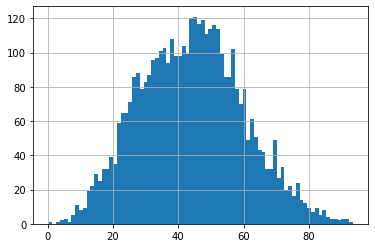

In [11]:
df = df['%']
print('Стандартное отклонение: ', df.std())
print('Среднее: ', df.mean())
df.hist(bins=80)

In [12]:
MEAN = df.sample(n = int(N)).mean()  # Возьмем выборку из случайных n значений
print('Среднее выборки: ', MEAN)
print('Среднее генеральной совокупности: ', df.mean())
print('Доверительный интервал: (', MEAN-Delta, ', ', MEAN+Delta, ')', sep='')

Среднее выборки:  48.00588235294117
Среднее генеральной совокупности:  44.07946954813346
Доверительный интервал: (43.00588235294117, 53.00588235294117)


In [15]:
# df.boxplot(by='%')

In [16]:
# from scipy.stats import norm
# norm.ppf(0.95, loc=0, scale=1)


# Проверка гипотез с помощью Python. 

In [17]:
from scipy import stats  # Импортируем библиотеку

np.random.seed(21)  # Закрепим seed для воспроизводимости результата.

# Генерируем случайное множество с нормальным распределением, где среднее = loc, а стандартное отклонение = scale
A = stats.norm.rvs(loc=50, scale=10, size=500)  
B = stats.norm.rvs(loc=49, scale=10, size=1500) 


t, p = stats.ttest_ind(A, B)
t, p

(3.0258839844589733, 0.0025107075866209454)

In [18]:
stats.ttest_ind(A, B, equal_var = False)

Ttest_indResult(statistic=3.019304910727292, pvalue=0.002609079015138788)

Мы получаем хорошее значение p, равное 0,0026, и, таким образом, мы отклоняем нулевую гипотезу и, таким образом,
это доказывает, что средние значения двух распределений различны и различие статистически значимо.

#### И действительно, если посмотреть на сгенерированные выборки. 

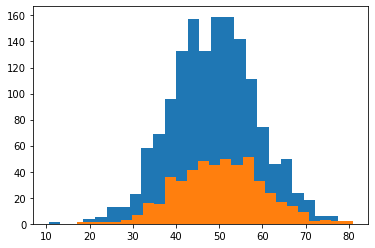

In [19]:
plt.hist(B, bins=25); #Выборка A
plt.hist(A, bins=25);  #Выборка B

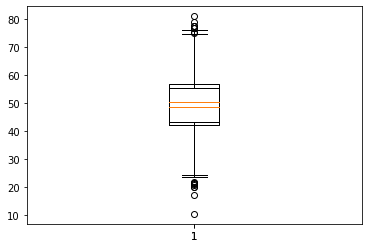

In [20]:
plt.boxplot(A);
plt.boxplot(B);

# Проверка гипотез

### t-Тест Стьюдента

In [21]:
from scipy import stats

np.random.seed(42)  # Закрепим seed для воспроизводимости результата.

## Определим 2 случайных распределения
N = 100  #Размер выборок

b = np.random.randn(N) #Нормальное распределение с mean = 0 and var = 1
a = np.random.randn(N) + 1.5 #Нормальное распределение с mean = 1.5 and var = 1

 
t , p  = stats.ttest_ind(a, b)
print("t = " + str(t))
print("p = " + str(p))

# Чем больше значение t-score, тем больше группы отличаются

# Мы получаем хорошее значение p, меньше 0,05, и, таким образом, мы отклоняем нулевую гипотезу и, таким образом,
# это доказывает, что средние значения двух распределений различны и различие статистически значимо.

t = 12.348223942992178
p = 2.395356067387906e-26


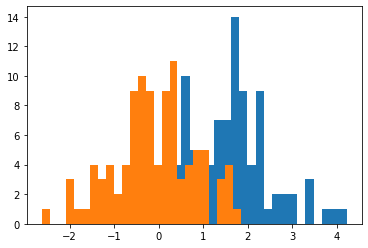

In [22]:
plt.hist(a, bins=25); #Выборка a
plt.hist(b, bins=25);  #Выборка b

# a. Одновыборочный T-test (Выборка + ГС)

<div class="alert alert-info">
<b>Описание: </b>
Давайте попробуем это на одном образце. Тест покажет нам, отличаются ли средние значения выборки и генеральной совокупности (сравниваем с генеральной!). Рассмотрим количество голосующих в Индии и население всего Мира. Отличается ли средний возраст избирателей Индии от возраста населения? Сейчас выясним!
</div>

In [23]:
from scipy import stats
 

population_ages1=stats.norm.rvs(loc=18, scale=45, size=150000)   
population_ages2=stats.norm.rvs(loc=18, scale=10, size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))  # Сгенерировали всю популяцию. 

india_ages1=stats.norm.rvs(loc=18, scale=45, size=9000)  # Индия 1
india_ages2=stats.norm.rvs(loc=18, scale=35, size=9000)
india_ages=np.concatenate((india_ages1, india_ages2)) #Выборка
population_ages.mean()

18.04097903032585

In [24]:
india_ages.mean()

17.912805318044327

In [25]:
stats.ttest_1samp(a=india_ages, popmean=population_ages.mean())

Ttest_1sampResult(statistic=-0.42891365181458957, pvalue=0.6679911980738282)

**Теперь это значение `statistic=0.1197` говорит нам, насколько отклоняется выборочное среднее от нулевой гипотезы.**

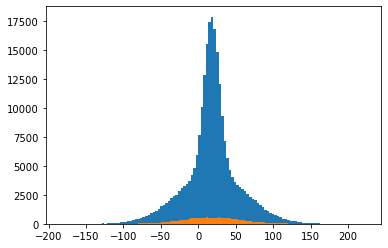

In [26]:
plt.hist(population_ages, bins=120); # Вся популяция.
plt.hist(india_ages, bins=120);  # Выборка

# b. Двух-выборочный T-test (Две выборки)

<div class="alert alert-info">
<b>Описание: </b>
Такой тест показывает, имеют ли две выборки данных разные средние значения (Теперь у нас две разные выборки, а не одна!). Здесь мы принимаем нулевую гипотезу о том, что обе группы имеют равные средние. Для этого нам не нужен известный параметр численности.
</div>

In [27]:
np.random.seed(84)
maharashtra_ages1=stats.norm.rvs(loc=17,scale=5,size=3000)
maharashtra_ages2=stats.norm.rvs(loc=17,scale=15,size=2000)
 

maharashtra_ages=np.concatenate((maharashtra_ages1,maharashtra_ages2))
maharashtra_ages.mean()

16.93951973942959

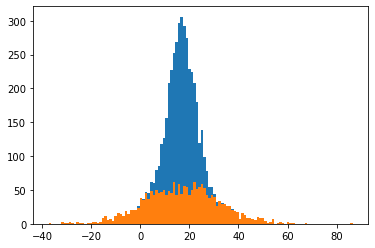

In [28]:
#Раскомментировать, если интересно увидеть отличия визуально
plt.hist(maharashtra_ages, bins=120);
plt.hist(maharashtra_ages2, bins=120);

In [29]:
stats.ttest_ind(a=india_ages, b=maharashtra_ages, equal_var=False)  # Смотри сюда!!! 

Ttest_indResult(statistic=2.929306138816564, pvalue=0.003400545578247028)

**Значение `pvalue= 0.0014` говорит о том, что существует вероятность 0.14%, что данные выборки настолько далеко друг от друга
для двух одинаковых групп. Это меньше, чем уровень достоверности 5%.**

In [30]:
#Расскомментировать, если интересно увидеть отличия визуально
# plt.hist(india_ages, bins=120);
# plt.hist(maharashtra_ages, bins=120);

# c. Paired T-test (Сравнение зависимых)

<div class="alert alert-info">
<b>Описание: </b>
    
T-критерий парной выборки, иногда называемый `t-критерием` зависимой выборки, представляет собой статистическую процедуру, используемую для определения того, равна ли нулю средняя разница между двумя наборами наблюдений. В парном выборочном `t-тесте` каждый субъект или объект измеряется дважды, в результате чего получаются пары наблюдений. Общие применения парного `t-критерия` выборки включают исследования случай-контроль или планы повторных измерений. 

 Предположим, вас интересует оценка эффективности программы обучения компании. Один из подходов, который вы можете рассмотреть, - это измерение производительности выборки сотрудников до и после завершения программы и анализ различий с использованием парного выборочного `t-критерия`. 
</div>

In [31]:
np.random.seed(12)
before = stats.norm.rvs(scale = 30, loc = 250, size = 100)
after = before + stats.norm.rvs(scale = 5, loc = -.273, size = 100)
weight_df = pd.DataFrame({"weight_before":before,
                         "weight_after":after,
                         "weight_change":after-before})
weight_df.describe()

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,245.670775,244.316557,-1.354218
std,31.536594,31.351874,5.157803
min,155.577504,155.560250,-13.370467
25%,227.831705,224.927586,-5.204568
50%,246.688266,246.142588,-1.629565
75%,265.132293,261.730528,1.989948
max,336.154582,332.751176,14.935431


In [32]:
stats.ttest_rel(a=before, b=after)

Ttest_relResult(statistic=2.625571255881005, pvalue=0.01002290520917281)

**Итак, мы видим, что у нас есть только 1% шансов найти такие различия между образцами случайно.**

# Практическое применение t-Тест Стьюдента

<div class="alert alert-info">
<b>Задание: </b>
    
Представим, что вы следователь какой-то крупной рекламной компаннии. 
Ваша задача иследовать рынок манго в течение последних нескольких лет.
У вас уже есть предварительные данные. Ваши подчиненные решили схалтурить и принести вам совсем другие отчеты. 

Сможели ли вы их разоблачить с помощью t-Тест Стьюдента?
</div>

<p style="align: center;"><img align=center src="https://www.canadianbusiness.com/wp-content/uploads/2012/02/6ed2b4b84defad6ff7b3b813f634.jpg"  width=400></p>



In [33]:
avocado = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/avocado.csv'
Students = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/StudentsPerformance.csv'

A = pd.read_csv(avocado, sep=',', index_col=0, error_bad_lines=False).AveragePrice[:1000]
B = pd.read_csv(Students, sep=',', index_col=0, error_bad_lines=False)['math score']
t, p = stats.ttest_ind(A, B)
t, p

(-135.56983375430264, 0.0)

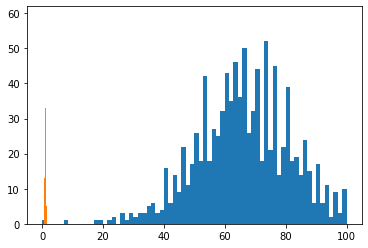

In [34]:
#и действительно выборки пренадлежать разным распределениям

plt.hist(B, bins=70);
plt.hist(A, bins=70);

# $\chi^{2}$ -  Критерий пирсона

In [35]:
import scipy as spy
from scipy import stats

# Сгенерируем случайную матрицу 10х5
X, y = np.random.randint(2, size=50).reshape(10, 5), np.random.randint(2, size=10) 
contingency_table = spy.sparse.coo_matrix( (np.ones_like(y), (X[:, 0], y)),    
                                         shape=(np.unique(X[:, 0]).shape[0], 
                                                np.unique(y).shape[0])).A

print('Реальная таблица')
print(contingency_table)

chi2, p, dof, expected =  stats.chi2_contingency(contingency_table)

print(chi2, p, dof)

print('Ожидаемая таблица')
print(expected)

# Возвращает:
# chi2 : Посчитанную статистику теста.
# p :  p-value теста
# dof : Степени свободы
# expected : Ожидаемые частоты, основанные на предельных суммах таблицы.

Реальная таблица
[[6 0]
 [1 3]]
3.353174603174603 0.0670755382739151 1
Ожидаемая таблица
[[4.2 1.8]
 [2.8 1.2]]


In [36]:
contingency_table = [[207, 3], [74, 45]]
chi2, p, dof, expected =  stats.chi2_contingency(contingency_table)
p

1.134065616009821e-18

**Пример использования Хи-квадрат теста**

In [37]:
from scipy import stats

 
table = [[10, 20, 30],
         [6,  9,  17]]

print(np.array(table))
stat, p, dof, expected = stats.chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Вероятно независимы')
else:
    print('Вероятно зависимы')

[[10 20 30]
 [ 6  9 17]]
stat=0.272, p=0.873
Вероятно независимы


In [38]:
subjects = pd.DataFrame(
    [
        [25,46,15],
        [15,44,15],
        [10,10,20]
    ],
    index=['Биология','Химия','Физика'],
    columns=['Math SL AA','Math SL AI','Math HL'])
subjects

,Math SL AA,Math SL AI,Math HL
Биология,25,46,15
Химия,15,44,15
Физика,10,10,20


**Если рассчитанный хи-квадрат больше критического значения, мы отклоняем нулевую гипотезу.**

In [39]:
chi, pval, dof, exp = stats.chi2_contingency(subjects) #  
print('p-value is: ', pval)
significance = 0.05
p = 1 - significance
critical_value = stats.chi2.ppf(p, dof)
print('chi=%.6f, критическоре значение=%.6f\n' % (chi, critical_value))



if chi > critical_value:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
        Они не независимы.""" % (significance))
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы. 
        Они независимы.""" % (significance))

p-value is:  0.0004176680832291999
chi=20.392835, критическоре значение=9.487729

На 0.05 уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
        Они не независимы.


**В качестве альтернативы мы можем сравнить p-значение и уровень значимости. Если значение p <уровня значимости, мы отклоняем нулевую гипотезу.**

In [40]:
chi, pval, dof, exp = stats.chi2_contingency(subjects)
significance = 0.05
print('p-value=%.6f, significance=%.2f\n' % (pval, significance))


if pval < significance:
    print("""На %.2f уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.""" % (significance))
else:
    print("""На %.2f уровене значимости, мы принимаем нулевые гипотезы.  
            Они независимы.""" % (significance))

p-value=0.000418, significance=0.05

На 0.05 уровене значимости, мы отвергаем нулевые гипотезы и принимаем H1.
            Они не независимы.


# Точный критерий Фишера 

<div class="alert alert-info">
<b>Вспомним: </b>
    
Критерий Стьюдента позволяет работать с численными переменными, но не позволяет работать с категориальными. Для этого существует критерий Фишера (или Хи-квадрат). Одна из его задач сказать, насколько случайно распределены значения между группами. Позволяет проверить гипотезу, есть ли значимый перевес между группами. Смотри пример в лекции.
    
</div>

<div class="alert alert-info">
<b>Пример: </b>
    
Например, вы хотите проверить нет ли дискриминации 
по половому признаку в сфере Data Science.
Вы узнали, что в какой-то компании после серии собеседований 
107 мужчин взяли на работу, а отказали 93-м мужчинам. 
А среди женщин 74 взяли, а отказали 45-и.
Относится ли руководство компании 
предвзято к мужчинам или к женщинам?
    
</div>

In [41]:
import scipy as spy

x = [[107,93],[74,45]]
print(x)
oddsratio, pvalue = spy.stats.fisher_exact(x)

oddsratio, pvalue

[[107, 93], [74, 45]]


(0.6996512641673932, 0.1607594221528123)

# Проанализируем теперь рынок жилья в New York City

New York City Airbnb Open Data
Airbnb listings and metrics in NYC, NY, USA (2019)

<p style="align: center;"><img align=center src="https://upload.wikimedia.org/wikipedia/commons/5/5a/New_York_City_District_Map.png
"  width=400></p>


<div class="alert alert-info">
<b>Предостирежение: </b>
    
Для построения доверительного интервала с помощью метода, показанного выше, важно, чтобы распределение исследуемой выборки имело нормально распределение
</div>

In [42]:
url  = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/AB_NYC_2019.csv'
df = pd.read_csv(url, error_bad_lines=False)
#df = pd.read_csv('AB_NYC_2019.csv')
df.dropna(how='any',inplace=True)
df.head(4)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot:>

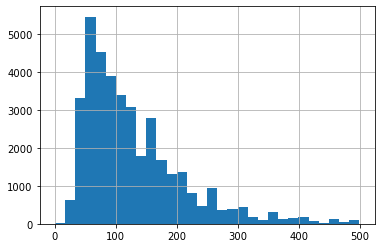

In [43]:
df[df.price<500].price.hist(bins=30)

In [44]:
print('Можно ли использовать тут наш подход?')

Можно ли использовать тут наш подход?


# Теперь сделаем распределение нормальным

<AxesSubplot:>

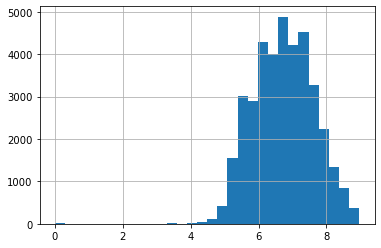

In [45]:
np.log2(abs(df[df.price<500].price)+1).hist(bins=30)

In [46]:
# df.neighbourhood_group.hist()

In [47]:
print(df[df.price<400].price.mean())

data = df[(df.neighbourhood_group == 'Brooklyn') | (df.neighbourhood_group=='Staten Island') | (df.neighbourhood_group=='Queens')].price

mean_confidence_interval(data, confidence=0.999) # Возможно вам понадобиться эта функция.

122.56345677697612


(111.68856960410567, 115.49388042203987, 119.29919123997406)

## =========================================================================

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

Решение:

$\beta$ = 0.95  =>  
$\alpha$ = 0.05  =>  
1 - $\alpha$ / 2 = 0.975  =>  
Z $\alpha$ = 1.96  =>   
n = (Z $\alpha$ * $\sigma$  / $\Delta$)$^2$

In [1]:
import numpy as np  
import pandas as pd
from scipy import stats
import scipy as spy
import math
import matplotlib.pyplot as plt   
import seaborn as sns 
import scipy.stats as stats

In [2]:
### Ваши код/вычисления...

confidence_interval = 0.95
significance_level = 1 - confidence_interval
level = 1 - significance_level / 2
disp = 225
delta = 3
n = round((stats.norm.ppf(level) * math.sqrt(disp) / delta)**2)
print('Минимально необходимый объем выборки для построения интервальной оценки среднего:', n)

Минимально необходимый объем выборки для построения интервальной оценки среднего: 96


In [3]:
def quantity(confidence=0.95, disp=225, delta=3):
    n = round((stats.norm.ppf((1 + confidence) / 2) * math.sqrt(disp) / delta)**2)
    return n
print('Минимально необходимый объем выборки для построения интервальной оценки среднего:', \
      quantity(confidence=0.95, disp=225, delta=3))

Минимально необходимый объем выборки для построения интервальной оценки среднего: 96


In [4]:
n = round((1.96 * math.sqrt(225) / 3)**2) 
print('Минимально необходимый объем выборки для построения интервальной оценки среднего:', n)

Минимально необходимый объем выборки для построения интервальной оценки среднего: 96


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

Решение:

($\overline x$ - $\sigma$ / sgrt(n) * Z $\alpha$;  $\overline x$ + $\sigma$ / sqrt(n) * Z $\alpha$)




$\beta$ = 0.98  =>  
$\alpha$ = 0.02  =>  
1 - $\alpha$ / 2 = 0.99  =>  
Z $\alpha$ = 2.33  =>  
n = (Z $\alpha$ * $\sigma$  / $\Delta$)$^2$

In [5]:
### Ваши код/вычесления...

confidence_interval = 0.98
significance_level = 1 - confidence_interval
level = 1 - significance_level / 2
quantity = 25
std = 15
average = 130
L = round((average + std / math.sqrt(quantity) * stats.norm.ppf(level)) - \
          (average - std / math.sqrt(quantity) * stats.norm.ppf(level)))
print('Длина полученного доверительного интервала:', L)

Длина полученного доверительного интервала: 14


In [6]:
def confidence_interval(confidence=0.98, count=25, std=15, average=130):
    L = round((average + std / math.sqrt(quantity) * stats.norm.ppf(level)) - \
              (average - std / math.sqrt(count) * stats.norm.ppf(level)))
    return L
print('Длина полученного доверительного интервала:', confidence_interval(confidence=0.98, count=25, std=15, average=130))

Длина полученного доверительного интервала: 14


In [7]:
L = round((130 + 15 / math.sqrt(25) * 2.33) - (130 - 15 / math.sqrt(25) * 2.33))
print('Длина полученного доверительного интервала:', L)

Длина полученного доверительного интервала: 14


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [8]:
population_men = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

### Ваш код...
alpha = 0.001 # Уровень значимости
result = stats.ttest_ind(population_men, population_women)
print(result)

if result.pvalue < alpha:
    print('Отклоняем гипотезу Н0')
else:
    print('Не отклоняем гипотезу Н0')

Ttest_indResult(statistic=1.059428170724815, pvalue=0.28940484899984087)
Не отклоняем гипотезу Н0


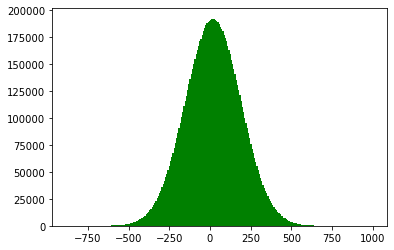

In [9]:
plt.hist(population_men, color='green', bins=250); #Выборка a
plt.hist(population_women, color='red', bins=250);  #Выборка b

Text(0.5, 1.0, 'Распределение роста мужчин и женщин')

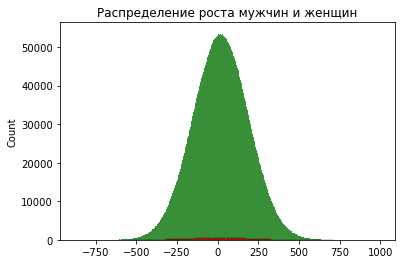

In [10]:
sns.histplot(population_men, color='green')
sns.histplot(population_women, color='red')
plt.title('Распределение роста мужчин и женщин')


### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

Решение:

sqrt(n) = ( $\sigma$ * Z $\alpha$ / $\Delta$ )


$\beta$ = 0.95  =>  
$\alpha$ = 0.05  =>  
1 - $\alpha$ / 2 = 0.975  =>  
Z $\alpha$ = 1.96 =>   
n = (Z $\alpha$ * $\sigma$  / $\Delta$)$^2$

In [11]:
confidence_interval = 0.95
significance_level = 1 - confidence_interval
level = 1 - significance_level / 2
std = 150
delta = 50
n = round((stats.norm.ppf(level) * std / delta)**2)
print('Для исследования среднего чека за кофе в случайном городе необходимо', n, 'чеков')

Для исследования среднего чека за кофе в случайном городе необходимо 35 чеков


In [12]:
def check(confidence=0.95, std=150, delta=50):
    n = round((stats.norm.ppf((1 + confidence) / 2) * std / delta)**2)
    return n
print('Для исследования среднего чека за кофе в случайном городе необходимо', check(confidence=0.95, std=150, delta=50),\
      'чеков')

Для исследования среднего чека за кофе в случайном городе необходимо 35 чеков


In [13]:
n = round((1.96 * 150 / 50)**2)
print('Для исследования среднего чека за кофе в случайном городе необходимо', n, 'чеков')

Для исследования среднего чека за кофе в случайном городе необходимо 35 чеков


<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [14]:
observations = pd.DataFrame([[10, 15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [15]:
alpha = 0.05
result = stats.ttest_ind(observations['Ответ волшебника'], observations['Реальность'])
print(result)

if result.pvalue < alpha:
    print('Отклоняем гипотезу Н0')
else:
    print('Не отклоняем гипотезу Н0')

Ttest_indResult(statistic=0.0, pvalue=1.0)
Не отклоняем гипотезу Н0


In [16]:

# Учтите, что у тестов, в том чилсле и точного теста Фишера под нелевой гипотезой подразумевается случайность/отсутсвие эффекта


# Некоторые реальные данные по результатам принятий решений контролирующих органов для 2-x юр. лиц.

# HO: В отношении ИП принятия решений не менее лояльно, чем в отношении ООО (resolutions_IE >= resolutions_LTD)
# H1: В отношении ИП принятия решений более лояльно, чем в отношении ООО (resolutions_IE < resolutions_LTD)

resolutions = pd.DataFrame([[69, 37],[4, 5]],
                            index=['Положительно','Отрицательно'],
                            columns=['ИП','ООО'])

resolutions

,ИП,ООО
Положительно,69,37
Отрицательно,4,5


In [17]:
### Ваш код...
oddsratio, pvalue = stats.fisher_exact(resolutions)#Возможно пригодится эта функция.
oddsratio, pvalue


(2.331081081081081, 0.28352388958631314)

In [18]:
alpha = 0.05
result = stats.fisher_exact(resolutions)
print(pvalue)

if pvalue < alpha:
    print('Отклоняем гипотезу Н0')
else:
    print('Не отклоняем гипотезу Н0')

0.28352388958631314
Не отклоняем гипотезу Н0


<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [19]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence=0.90):
    average = np.mean(data)      
    delta = stats.sem(data) * stats.norm.ppf((1 + confidence) / 2) / math.sqrt(len(data))
    return round(average-delta, 2), round(average+delta, 2)

print('Доверительный интервал для выборки data:', mean_confidence_interval(data, 0.90))


Доверительный интервал для выборки data: (6.54, 6.72)


In [20]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence=0.90):
    quantity = len(data)
    average = np.mean(data)
    std = stats.sem(data)    
    delta = std * stats.norm.ppf((1 + confidence) / 2) / math.sqrt(quantity)
    return round(average-delta, 2), round(average+delta, 2)

print('Доверительный интервал для выборки data:', mean_confidence_interval(data, 0.90))


Доверительный интервал для выборки data: (6.54, 6.72)


<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [21]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

#Ваш код:
# H0: принадлежит
# H1: не принадлежит
alpha = 0.05
result = stats.ttest_ind(data_1, data_2)
print(result)

if result.pvalue < alpha:
    print('Отклоняем гипотезу Н0')
else:
    print('Не отклоняем гипотезу Н0')    

Ttest_indResult(statistic=7.35744682757447, pvalue=2.1159475572725764e-11)
Отклоняем гипотезу Н0


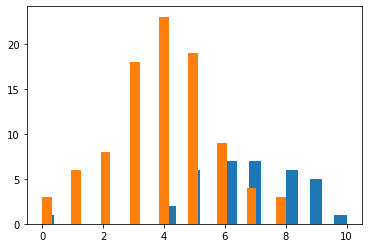

In [22]:
plt.hist(data_1, bins=25);
plt.hist(data_2, bins=25);

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [23]:
### Ваши выводы: Буду считать, что основная гипотеза не валидна, по причине незначительного уровня значимости p-value. 
### Буду склонятся к альтернативной гипотезе, но при этом понимать, что ни одна из них ничего не доказывает. 

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [24]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

drugs = np.concatenate((A, B))
drugs.mean()

170.1379867211236

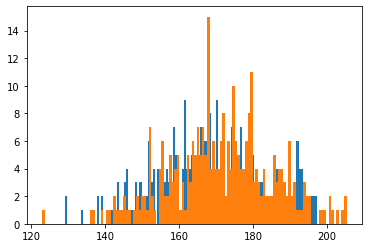

In [25]:
plt.hist(A, bins=120);
plt.hist(B, bins=120);

In [26]:
 stats.ttest_ind(a=A, b=B, equal_var=False)

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284961272800134)

In [27]:
alpha = 0.05
result = stats.ttest_ind(a=A, b=B, equal_var=False)
print(result)

if result.pvalue < alpha:
    print('Отклоняем гипотезу Н0')
else:
    print('Не отклоняем гипотезу Н0')

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284961272800134)
Не отклоняем гипотезу Н0


In [28]:
### При значении p-value меньше 0,05 различия били бы значимы.

In [33]:
alpha = 0.05
result = stats.ttest_ind(a=A, b=drugs, equal_var=False)
print(result)

if result.pvalue < alpha:
    print('Отклоняем гипотезу Н0')
else:
    print('Не отклоняем гипотезу Н0')

Ttest_indResult(statistic=-1.11629813919991, pvalue=0.26474740019324844)
Не отклоняем гипотезу Н0


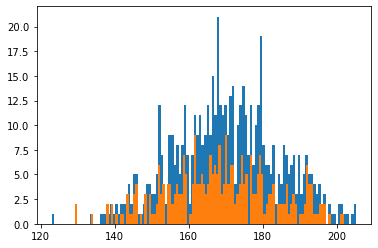

In [39]:
plt.hist(drugs, bins=120);
plt.hist(A, bins=120);

In [40]:
alpha = 0.05
result = stats.ttest_ind(a=drugs, b=B, equal_var=False)
print(result)

if result.pvalue < alpha:
    print('Отклоняем гипотезу Н0')
else:
    print('Не отклоняем гипотезу Н0')

Ttest_indResult(statistic=-1.1373740178854457, pvalue=0.255830714719079)
Не отклоняем гипотезу Н0


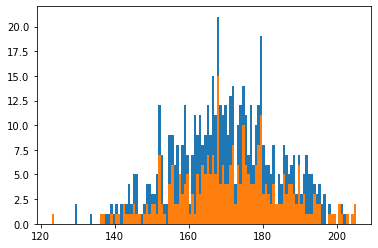

In [41]:
plt.hist(drugs, bins=120);
plt.hist(B, bins=120);